In [1]:
'''
link to dataset ("https://www.kaggle.com/mlg-ulb/creditcardfraud")
The 'credit card' dataset contains transactions made by a cardholder in a duration in 2 days i.e., two days in the
month of September 2013. Where there are total 284,807 transactions among which there are 492 i.e., 0.172%
transactions are fraudulent transactions. This dataset is highly unbalanced. Since providing transaction details of a
customer is considered to issue related to confidentiality, therefore most of the features in the dataset are transformed
using principal component analysis (PCA). V1, V2, V3,..., V28 are PCA applied features and rest i.e., ‘Time’,
‘Amount’ and ‘Class’ are non-PCA applied features. Class 0 represents a valid transaction and 1 represents a
fraudulent one.
'''

"\nThe 'credit card' dataset contains transactions made by a cardholder in a duration in 2 days i.e., two days in the\nmonth of September 2013. Where there are total 284,807 transactions among which there are 492 i.e., 0.172%\ntransactions are fraudulent transactions. This dataset is highly unbalanced. Since providing transaction details of a\ncustomer is considered to issue related to confidentiality, therefore most of the features in the dataset are transformed\nusing principal component analysis (PCA). V1, V2, V3,..., V28 are PCA applied features and rest i.e., ‘Time’,\n‘Amount’ and ‘Class’ are non-PCA applied features. Class 0 represents a valid transaction and 1 represents a\nfraudulent one.\n"

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [3]:
#reading dataset
df = pd.read_csv('creditcard.csv')

In [4]:
#shape
print(df.shape)

(284807, 31)


In [5]:
#peek at data
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#check if any NaN
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
#numerical summary -> only non-anonymized columns of interest
print(df.loc[:, ['Time', 'Amount']].describe().round(decimals=2))

            Time     Amount
count  284807.00  284807.00
mean    94813.86      88.35
std     47488.15     250.12
min         0.00       0.00
25%     54201.50       5.60
50%     84692.00      22.00
75%    139320.50      77.16
max    172792.00   25691.16


In [9]:
#features and target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

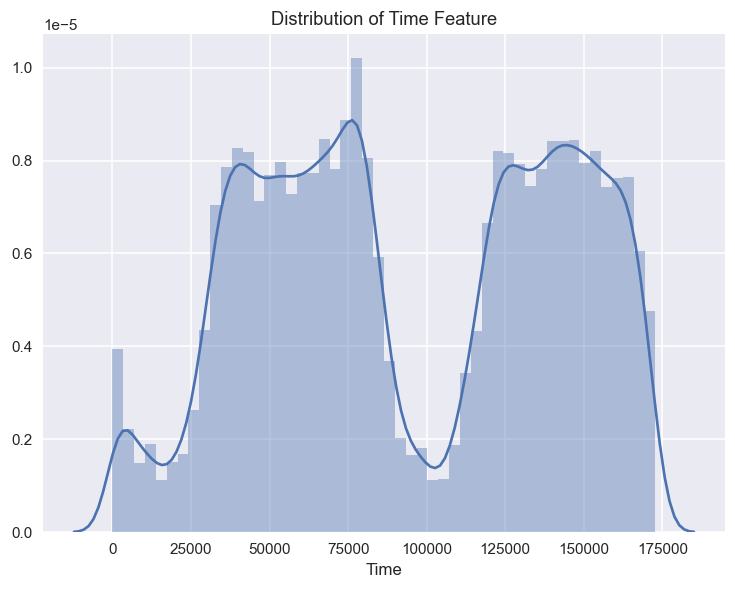

In [10]:
#visualization of time
plt.figure(figsize=(8,6),dpi=110)
plt.title('Distribution of Time Feature')
sns.distplot(df['Time'])
plt.show()

In [11]:
'''
This graph shows the times at which transactions were done
within two days. It can be seen that the least number of
transactions were made during night time and highest during
the days. 
'''

'\nThis graph shows the times at which transactions were done\nwithin two days. It can be seen that the least number of\ntransactions were made during night time and highest during\nthe days. \n'

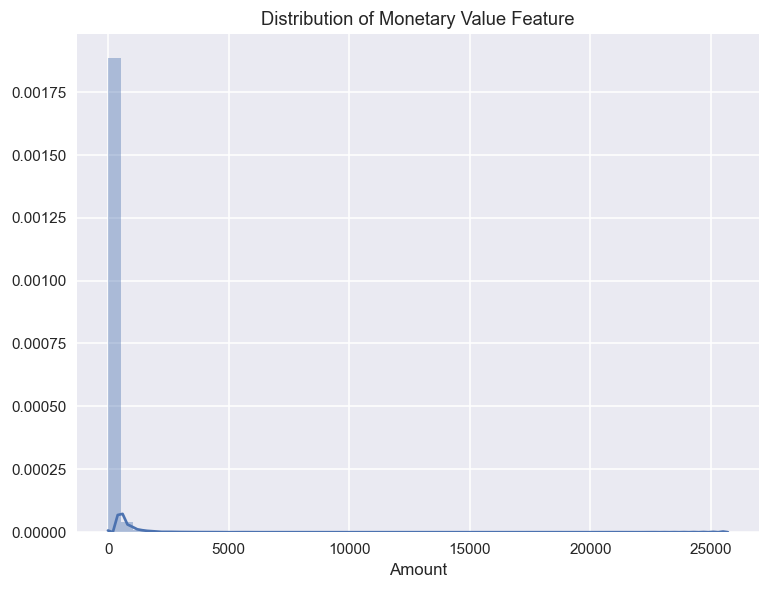

In [12]:
##visualization of amount
plt.figure(figsize=(8,6),dpi=110)
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df['Amount'])
plt.show()

In [13]:
'''
This graph represents the amount that was transacted. A
majority of transactions are relatively small and only a handful
of them come close to the maximum transacted amount.
'''

'\nThis graph represents the amount that was transacted. A\nmajority of transactions are relatively small and only a handful\nof them come close to the maximum transacted amount.\n'

In [14]:
#fraud vs. normal transactions
counts = df['Class'].value_counts()
normal = counts[0]
fraud = counts[1]
perc_normal = (normal/(normal+fraud))*100
perc_fraud = (fraud/(normal+fraud))*100
print('There were {} normal transactions ({:.4f}%) and {} fraud transactions ({:.4f}%).'.format(normal, perc_normal, fraud, perc_fraud))

There were 284315 normal transactions (99.8273%) and 492 fraud transactions (0.1727%).


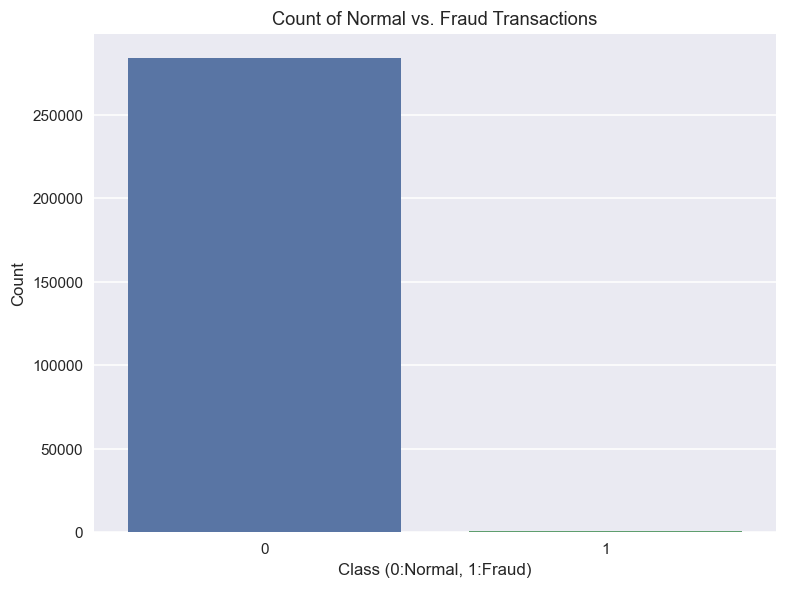

In [15]:
plt.figure(figsize=(8,6),dpi=110)
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Normal vs. Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')
plt.show()

In [16]:
'''
This graph shows that the number of fraudulent transactions is
much lower than the legitimate ones.
'''

'\nThis graph shows that the number of fraudulent transactions is\nmuch lower than the legitimate ones.\n'

In [17]:
'''
After checking this dataset, we plot a histogram for every
column. This is done to get a graphical representation of the
dataset which can be used to verify that there are no missing
any values in the dataset. This is done to ensure that we don’t
require any missing value imputation and the machine
learning algorithms can process the dataset smoothly
'''

'\nAfter checking this dataset, we plot a histogram for every\ncolumn. This is done to get a graphical representation of the\ndataset which can be used to verify that there are no missing\nany values in the dataset. This is done to ensure that we don’t\nrequire any missing value imputation and the machine\nlearning algorithms can process the dataset smoothly\n'

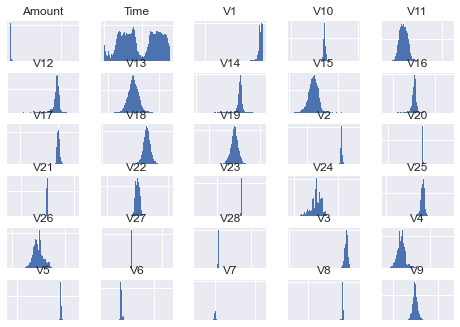

In [18]:
ax=X.hist(bins=100)
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

plt.show()

In [19]:
#skewness
print(X.skew())

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64


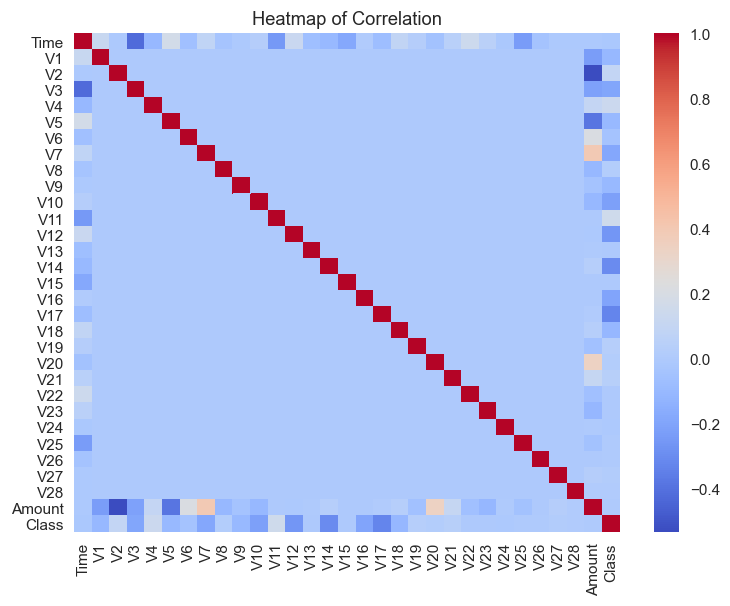

'\nAfter this analysis, we plot a heatmap to get a coloured\nrepresentation of the data and to study the correlation between\nout predicting variables and the class variable. This heatmap is\nshown below:\n'

In [20]:
#heatmap
corr = df.corr()
plt.figure(figsize=(8,6),dpi=110)
sns.heatmap(data=corr,cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()
'''
After this analysis, we plot a heatmap to get a coloured
representation of the data and to study the correlation between
out predicting variables and the class variable. This heatmap is
shown below:
'''

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(X[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [22]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(X[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [23]:
#concatenating newly created columns in original X
X = pd.concat([X, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

In [24]:
#dropping old amount and time columns
X.drop(['Amount', 'Time'], axis=1, inplace=True)

In [25]:
print(X.sample(5))

              V1        V2        V3        V4        V5        V6        V7  \
9184   -0.861655  0.904822  1.909681  0.342914  0.303565 -0.612925  0.685810   
15065   1.217696  0.126199  0.512310  0.514364 -0.513741 -0.692102 -0.111960   
191921  2.198267 -0.720561 -1.536745 -0.813872 -0.334404 -0.288727 -0.983360   
51826  -0.493324  0.694552  1.943072  0.221992 -0.321219 -0.367865  0.307059   
2374   -0.473115  0.996275  2.493954  3.115750 -0.480267  0.507490 -0.095556   

              V8        V9       V10  ...       V21       V22       V23  \
9184   -0.413946  1.474152 -0.396463  ... -0.374302 -0.413359 -0.235471   
15065   0.000527 -0.057735  0.133789  ... -0.218051 -0.716752  0.136708   
191921 -0.004555  0.177589  0.090885  ...  0.179375  0.550807  0.052209   
51826   0.082720  0.503758 -0.689574  ...  0.182669  0.632586 -0.233310   
2374    0.360578 -0.610364  0.706387  ...  0.199908  0.900588 -0.065819   

             V24       V25       V26       V27       V28  scaled_amo

In [26]:
'''
Creating a Training set for highly imbalanced data set
'''

'\nCreating a Training set for highly imbalanced data set\n'

In [27]:
#train test split
from sklearn.model_selection import train_test_split
#import resample for under_sampling
from sklearn.utils import resample

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#combining them back for resampling
train_data=pd.concat([X_train, y_train], axis=1)

In [30]:
#separate majority and minority class
normal = train_data[train_data['Class'] == 0]
fraud = train_data[train_data['Class'] == 1]

In [31]:
#downsample majority
normal_downsampled=resample(normal, replace=True, n_samples=len(fraud), random_state=42)

In [32]:
#combine minority and downsampled majority
downsampled=pd.concat([fraud, normal_downsampled])

In [33]:
#shuffling our data set
downsampled = downsampled.sample(frac=1).reset_index(drop=True)
print(downsampled.head(10))

          V1        V2         V3        V4         V5        V6         V7  \
0 -10.850282  6.727466 -16.760583  8.425832 -10.252697 -4.192171 -14.077086   
1   1.256235  0.347563   0.301851  0.693207  -0.376918 -1.072151   0.081165   
2  -3.043541 -3.157307   1.088463  2.288644   1.359805 -1.064823   0.325574   
3  -8.762083  2.791030  -7.682767  6.991214  -5.230695 -0.357388  -9.685621   
4  -0.443794  1.271395   1.206178  0.790371   0.418935 -0.848376   0.917691   
5 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431 -16.165539   
6   2.097934 -0.006747  -1.337829  0.248597   0.290266 -0.788011   0.258939   
7   1.243848  0.524526  -0.538884  1.209196   0.479538 -0.197429   0.049166   
8  -0.734303  0.435519  -0.530866 -0.471120   0.643214  0.713832  -1.234572   
9  -2.877176  4.569649  -9.553069  4.441079  -3.653961 -1.877981  -3.514353   

          V8        V9        V10  ...       V22       V23       V24  \
0   7.168288 -3.683242 -15.239962  ...  0.135535 -1.023967

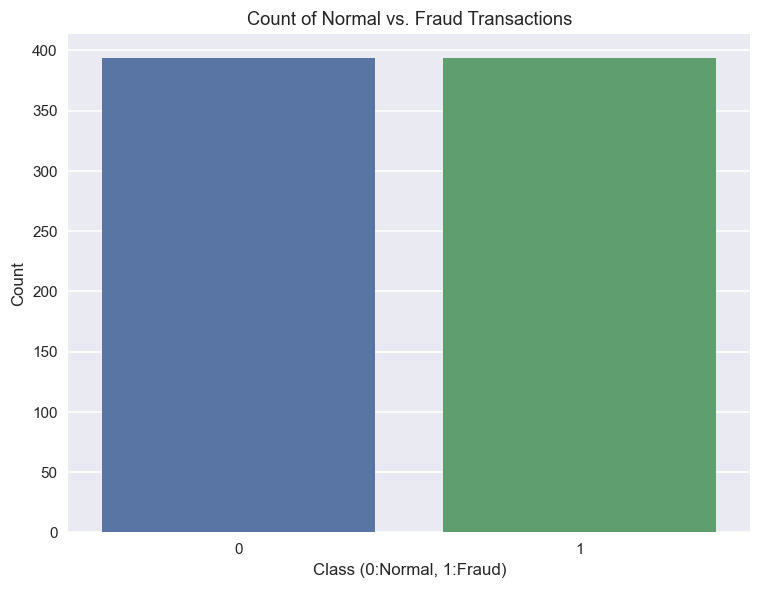

In [34]:
new_counts = downsampled['Class'].value_counts()
plt.figure(figsize=(8,6),dpi=110)
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Normal vs. Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')
plt.show()

In [35]:
# Balanced data

In [36]:
X = downsampled.drop('Class', axis=1)
y = downsampled['Class']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [39]:
#import all required packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [40]:
'''
To avoid overfitting, i used k-fold cross-validation.
To achieve high performance i made use of ROC-AUC performance measure, its output ranges from 0 to 1.
0 for worst and 1 for best score.
'''

'\nTo avoid overfitting, i used k-fold cross-validation.\nTo achieve high performance i made use of ROC-AUC performance measure, its output ranges from 0 to 1.\n0 for worst and 1 for best score.\n'

In [41]:
#Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.976403 (0.022643)
KNN: 0.975041 (0.019422)
CART: 0.899028 (0.044608)
SVM: 0.984171 (0.013651)
RF: 0.979096 (0.014709)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


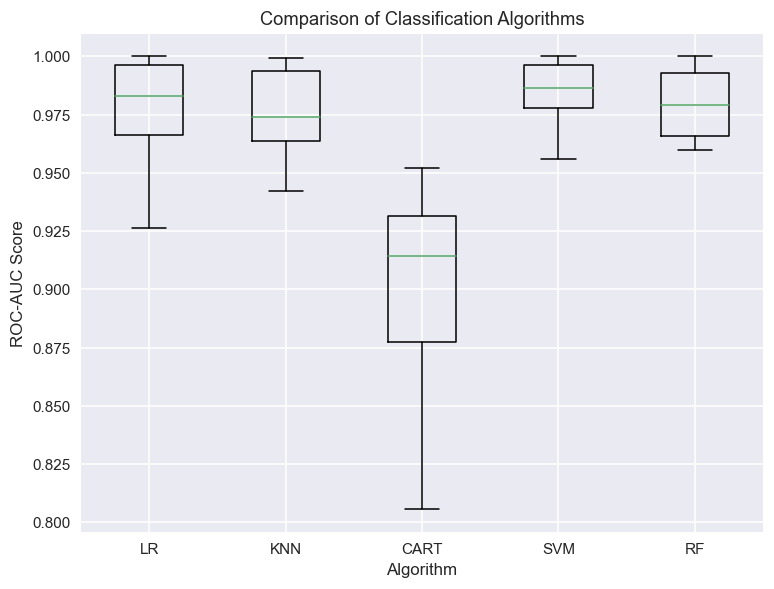

In [42]:
#plotting boxplot for comparing algorithms

fig = plt.figure(figsize=(8,6),dpi=110)
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [43]:
'''
As from the above plot its is clear that few algorithms out-performed others.
This project had not only focus on achieving the highest accuracy but also to create a business value.
So choosing Random Forest over other well performing algorithms is due to its high degree of comprehensiveness while 
slightly or no loss in performance comparatively.
'''

'\nAs from the above plot its is clear that few algorithms out-performed others.\nThis project had not only focus on achieving the highest accuracy but also to create a business value.\nSo choosing Random Forest over other well performing algorithms is due to its high degree of comprehensiveness while \nslightly or no loss in performance comparatively.\n'

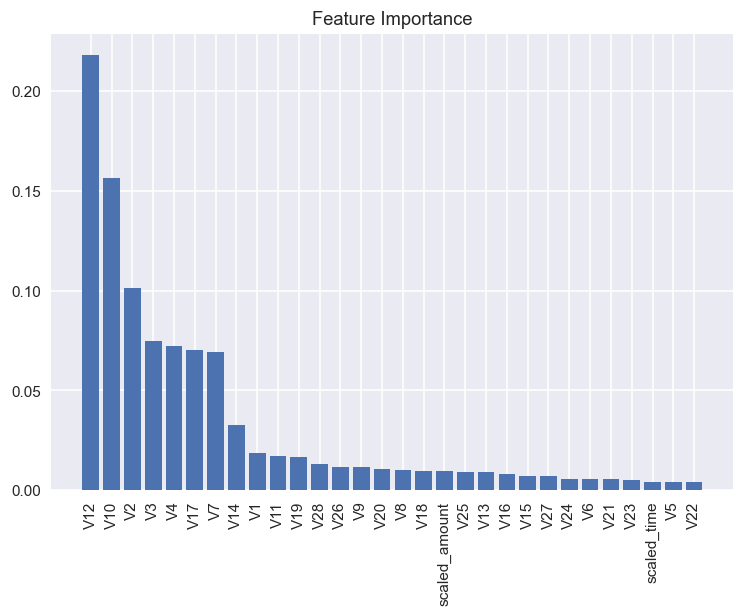

In [44]:
#Identifying Important Features in Random Forests

model = RandomForestClassifier(n_estimators=10, random_state=1)

model.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

named = [X.columns[i] for i in indices]
# Create plot
plt.figure(dpi=110)
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), named, rotation=90)
# Show plot
plt.show()

In [45]:
# confusion matrix of test data(from splitted balanced data)
y_pred=model.predict(X_test)
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[91  0]
 [ 2 65]]


In [47]:
# cosidering full dataset as a test set into already trained random forest model(trained with balanced data)
X_all=df.iloc[:,:-1]
y_all=df.iloc[:,-1]

In [48]:
scaler3 = StandardScaler()
scaler4 = StandardScaler()

scaled_time = scaler3.fit_transform(X_all[['Time']])
flat_list3 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list3)

In [49]:
scaled_amount = scaler4.fit_transform(X_all[['Amount']])
flat_list4 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list4)

In [50]:
X_all = pd.concat([X_all, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

In [51]:
X_all.drop(['Amount', 'Time'], axis=1, inplace=True)

In [52]:
X_all.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
236910,1.762601,-1.546365,-0.654744,-0.562808,-1.288972,-0.572495,-0.648377,-0.112086,0.136647,0.555370,...,-0.078518,-0.641686,0.338063,1.112631,-0.590672,-0.651446,-0.034062,0.001212,0.471176,1.141363
120717,-4.534299,-3.638361,2.449897,1.033472,1.503216,-0.671173,-0.252912,-0.191546,1.221746,0.644272,...,-0.939659,0.660754,2.773321,0.231807,0.841524,0.504803,0.806712,-1.062381,-0.269230,-0.397550
91780,-7.389263,0.682630,-2.127950,1.039620,-4.758310,-0.371017,-0.982629,3.018397,-0.754680,-1.781445,...,0.364274,0.009329,-1.044206,0.822277,0.267727,-0.683044,-1.971525,-0.943915,0.444389,-0.656773
214855,2.115373,0.139922,-1.932078,0.289822,0.672708,-0.572326,0.165558,-0.195583,0.547000,-0.373858,...,-0.402265,-1.052806,0.274654,-0.012917,-0.188499,0.205890,-0.063880,-0.036383,-0.350471,0.948283
249862,-0.637254,0.723600,-0.058291,-0.666328,1.255710,-0.718671,1.496894,-0.299136,-0.238134,-0.796718,...,0.038539,0.260471,-0.111362,0.591642,0.470914,-0.248373,0.001791,0.087040,-0.233327,1.259204


In [53]:
# confusion matrix of complete data 
y_all_pred=model.predict(X_all)
cmat2=confusion_matrix(y_all,y_all_pred)
print(cmat2)

[[276864   7451]
 [    19    473]]


In [55]:
print(classification_report(y_all,y_all_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.06      0.96      0.11       492

    accuracy                           0.97    284807
   macro avg       0.53      0.97      0.55    284807
weighted avg       1.00      0.97      0.99    284807



In [56]:
'''
obviously precision will be low because its an imbalanced data set and achieving 100% accuracy is nearly impossible.
'''

'\nobviously precision will be low because its an imbalanced data set and achieving 100% accuracy is nearly impossible.\n'

In [57]:
# for alternate way around lets improve our model with considering only important features helping in predictions.

In [58]:
#Selecting Important Features in Random Forests and training random forest model with this features

In [59]:
from sklearn.feature_selection import SelectFromModel
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(model, threshold=0.02)
# Feature new feature matrix using selector
features_important = selector.fit_transform(X_all, y_all)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(features_important, y_all, test_size=0.2, random_state=42)

In [61]:
# Train random forest using most important featres
model1 = model.fit(X_train, y_train)

In [62]:
#confusion matrix of important features test data
y_all_imp_pred=model1.predict(X_test)
cmat3=confusion_matrix(y_test,y_all_imp_pred)
print(cmat3)

[[56863     1]
 [   23    75]]


In [63]:
# performance is good considering only important features

In [64]:
print(classification_report(y_test,y_all_imp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [65]:
#confusion matrix of important features train data
y_all_imp_pred=model1.predict(X_train)
cmat4=confusion_matrix(y_train,y_all_imp_pred)
print(cmat4)

[[227449      2]
 [    22    372]]


In [66]:
print(classification_report(y_train,y_all_imp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.94      0.97       394

    accuracy                           1.00    227845
   macro avg       1.00      0.97      0.98    227845
weighted avg       1.00      1.00      1.00    227845



In [67]:
# random forest classifier performed excellent as was expected.

In [68]:
'''
Coclusion:

Since the entire dataset consists of only two days’ transaction
records, its only a fraction of data that can be made available
if this project were to be used on a commercial scale. Being
based on machine learning algorithms, the program will only
increase its efficiency over time as more data is put into it.

While we couldn’t reach out goal of 100% accuracy in fraud
detection, we did end up creating a system that can, with
enough time and data, get very close to that goal. As with any
such project, there is some room for improvement here.
'''

'\nCoclusion:\n\nSince the entire dataset consists of only two days’ transaction\nrecords, its only a fraction of data that can be made available\nif this project were to be used on a commercial scale. Being\nbased on machine learning algorithms, the program will only\nincrease its efficiency over time as more data is put into it.\n\nWhile we couldn’t reach out goal of 100% accuracy in fraud\ndetection, we did end up creating a system that can, with\nenough time and data, get very close to that goal. As with any\nsuch project, there is some room for improvement here.\n'